In [2]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 

In [3]:
df=pd.read_csv("video_stats.csv")

In [4]:
df=df.drop(columns=["num_peaks"])
df=df.drop(columns=["name","video","mean_acceleration","max_acceleration"])

In [5]:
df.head()

,mean_speed,max_speed,std_speed,weight(kg),height(m),bar height(m),jump status
0,300.714246,639.067022,121.804329,90,1.90,1.90,1
1,222.533015,647.511850,160.160976,95,1.91,1.96,1
2,311.066084,1657.120609,246.400006,95,1.91,1.99,1
3,259.761173,635.340970,142.784980,82,1.85,1.99,1
4,424.523214,2814.953228,348.906619,88,1.90,1.99,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean_speed     31 non-null     float64
 1   max_speed      31 non-null     float64
 2   std_speed      31 non-null     float64
 3   weight(kg)     31 non-null     int64  
 4   height(m)      31 non-null     float64
 5   bar height(m)  31 non-null     float64
 6   jump status    31 non-null     int64  
dtypes: float64(5), int64(2)
memory usage: 1.8 KB


In [7]:
df.describe()

,mean_speed,max_speed,std_speed,weight(kg),height(m),bar height(m),jump status
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,230.975776,1173.319143,175.732503,87.548387,1.906452,1.989032,0.516129
std,101.709062,1115.514418,134.368967,5.795623,0.054623,0.037537,0.508001
min,104.011430,347.152427,72.414355,73.000000,1.780000,1.900000,0.000000
25%,154.038360,469.548330,87.960951,82.000000,1.900000,1.960000,0.000000
50%,203.542346,639.067022,121.804329,88.000000,1.910000,1.990000,1.000000
75%,302.986647,1661.898459,225.156624,92.000000,1.910000,2.020000,1.000000
max,494.397360,5223.673156,672.559602,97.000000,2.040000,2.050000,1.000000


In [8]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [15]:


# Save the DataFrame to a CSV file
file_path = 'example.csv'
df.to_csv(file_path, index=False) 

In [16]:
AV= AutoViz_Class()

Shape of your Data Set loaded: (31, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variables c

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
mean_speed,float64,0.000000,NA,104.011430,494.397360,No issue
max_speed,float64,0.000000,NA,347.152427,5223.673156,"Column has 1 outliers greater than upper bound (3450.42) or lower than lower bound(-1318.98). Cap them or remove them., Column has a high correlation with ['mean_speed']. Consider dropping one of them."
std_speed,float64,0.000000,NA,72.414355,672.559602,"Column has 1 outliers greater than upper bound (430.95) or lower than lower bound(-117.83). Cap them or remove them., Column has a high correlation with ['mean_speed', 'max_speed']. Consider dropping one of them."
weight(kg),int64,0.000000,35,73.000000,97.000000,No issue
height(m),float64,0.000000,NA,1.780000,2.040000,Column has 12 outliers greater than upper bound (1.92) or lower than lower bound(1.88). Cap them or remove them.
bar height(m),float64,0.000000,NA,1.900000,2.050000,No issue
jump status,int64,0.000000,6,0.000000,1.000000,No issue


Number of All Scatter Plots = 15


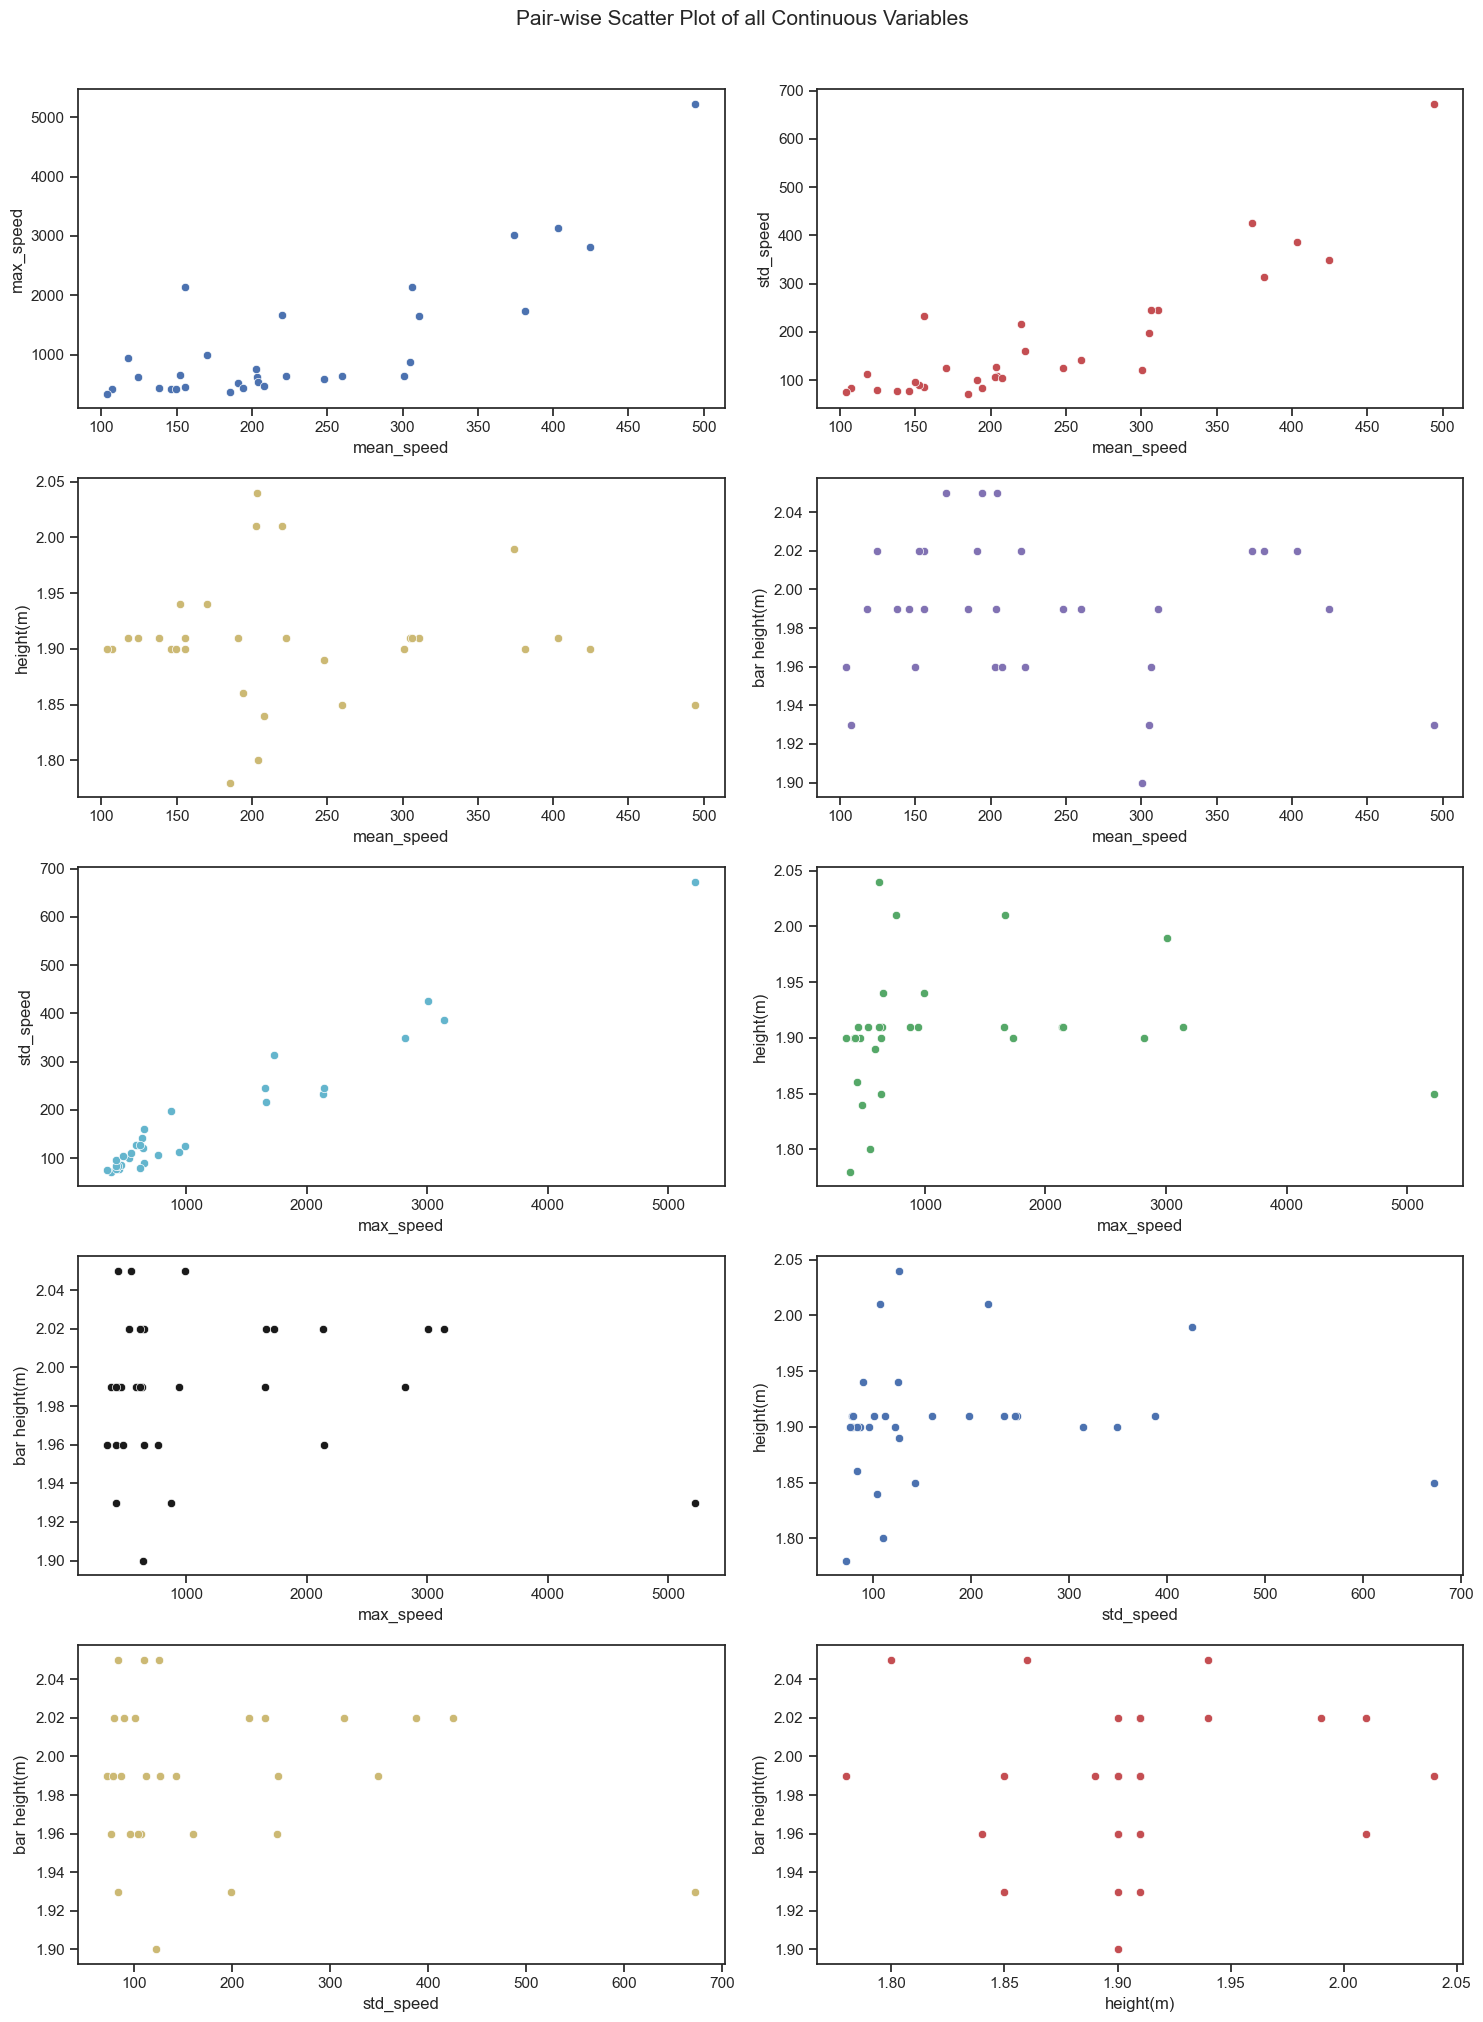

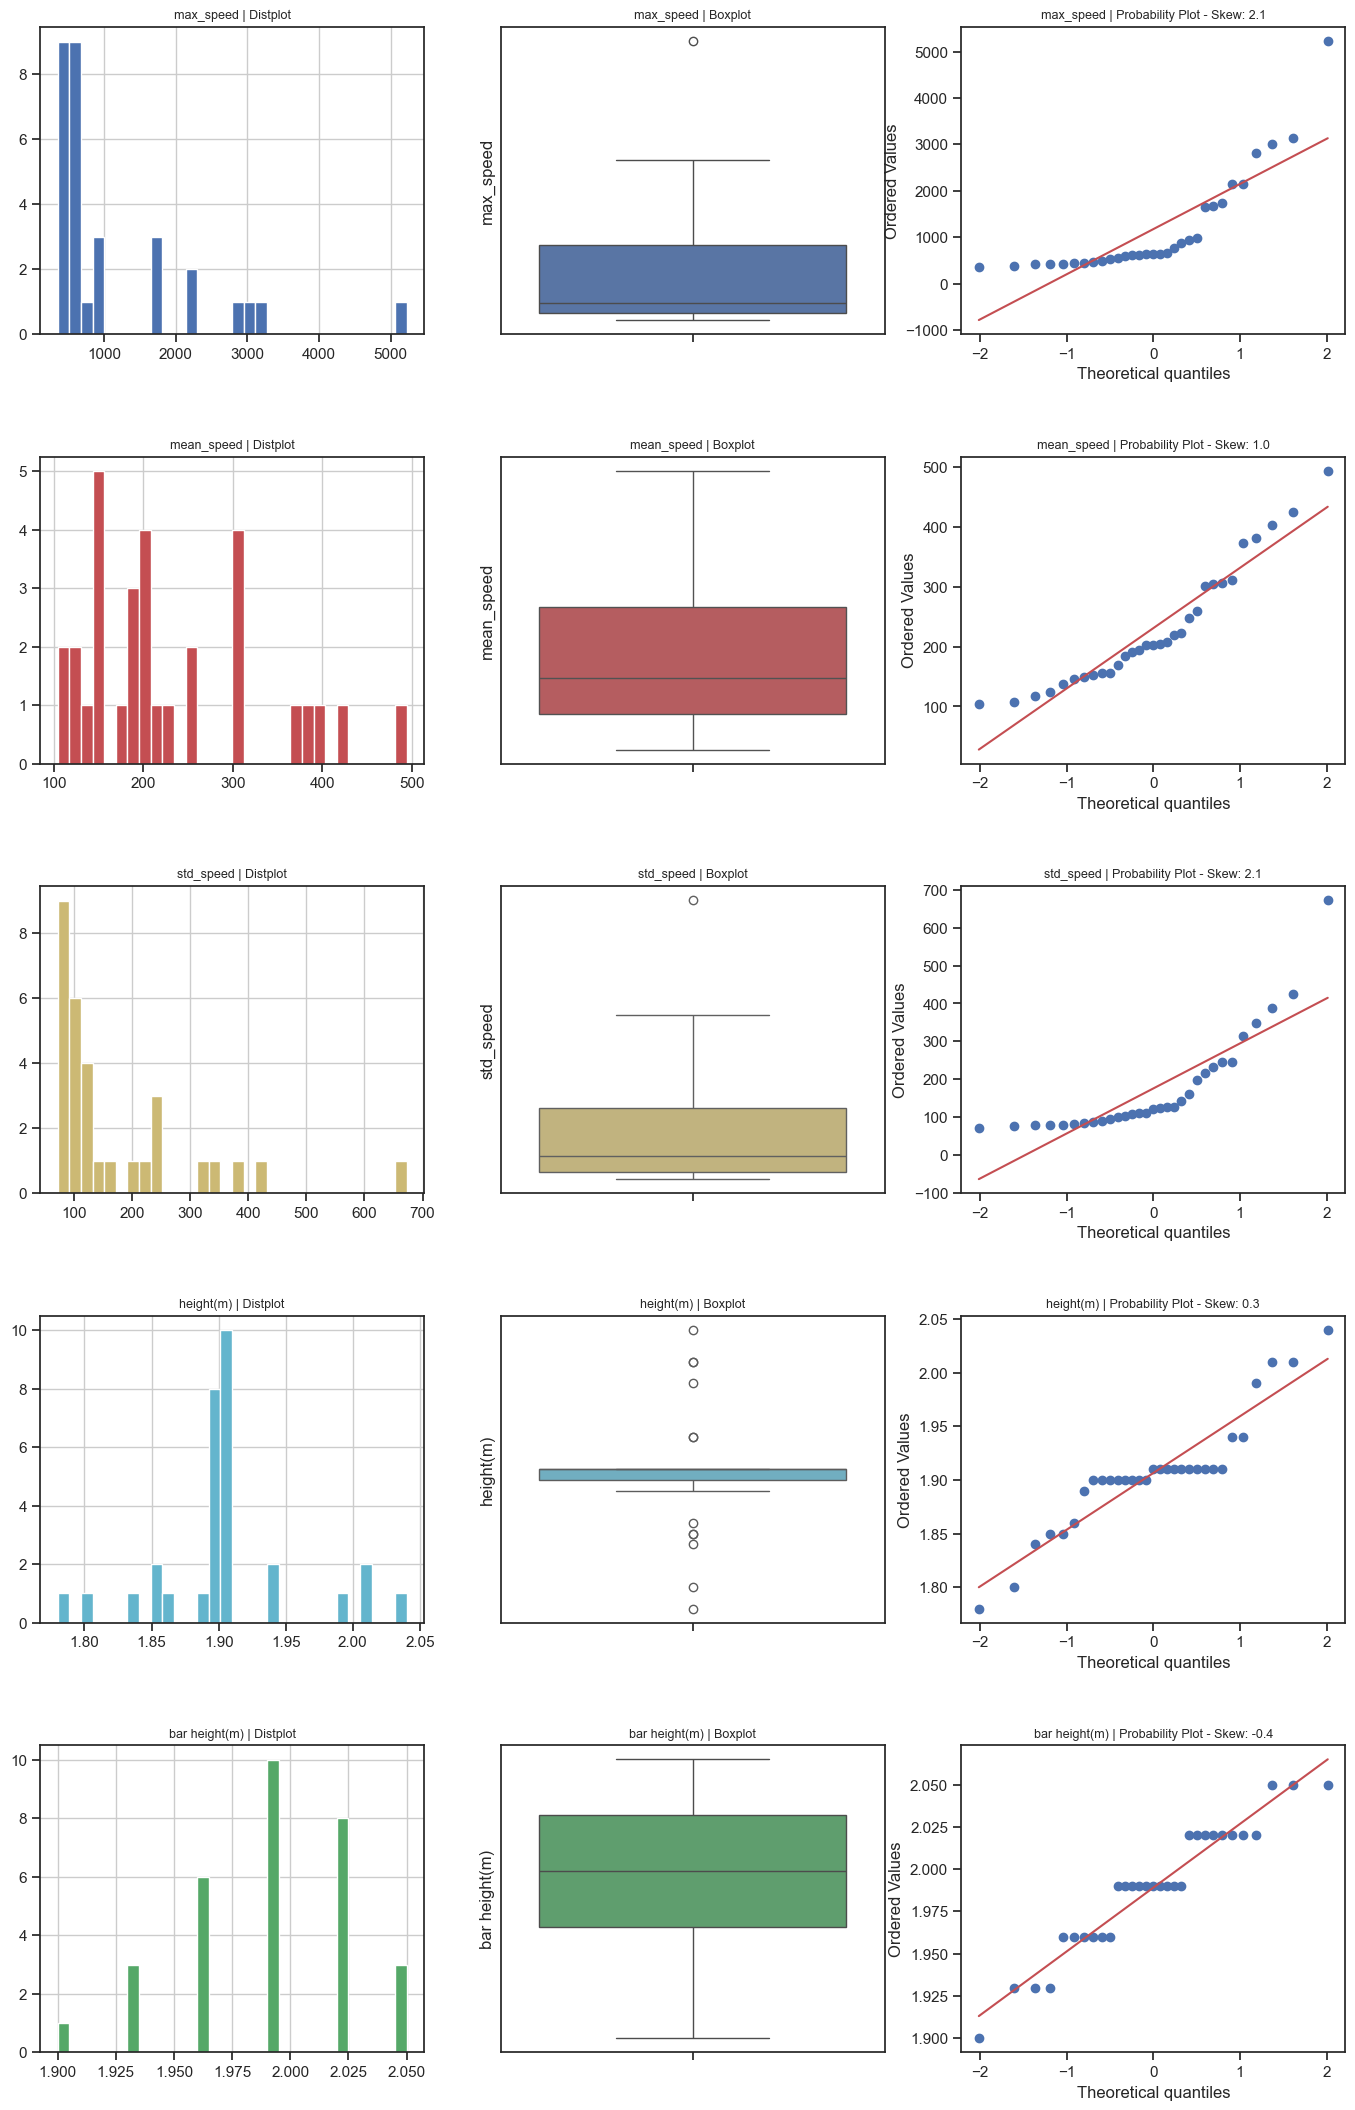

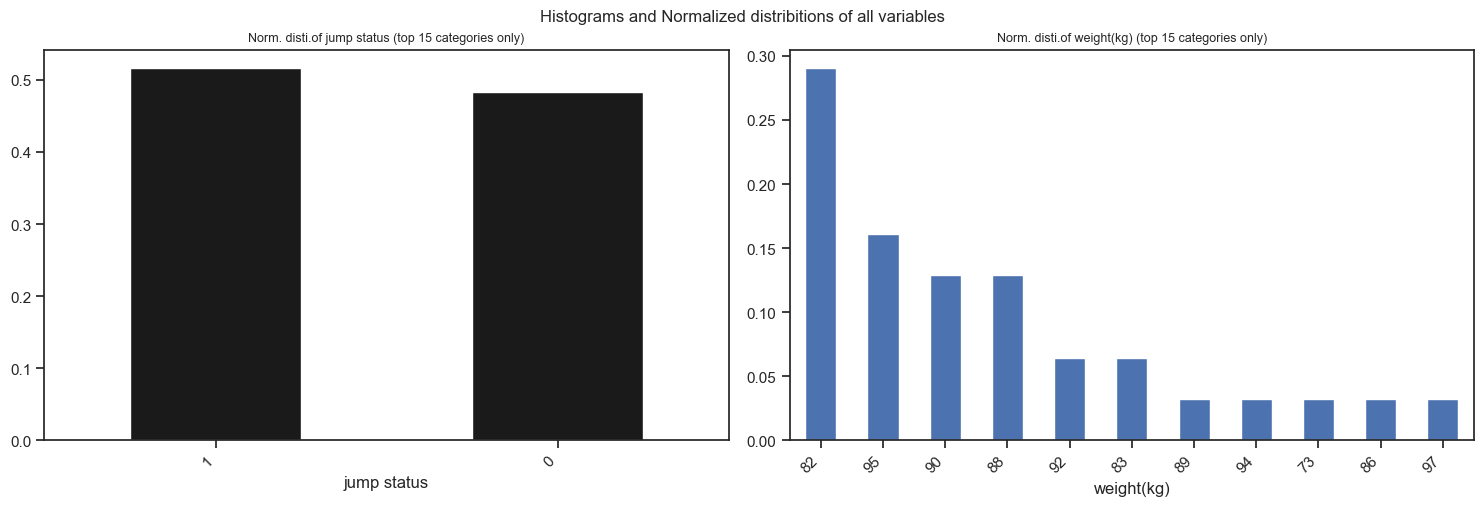

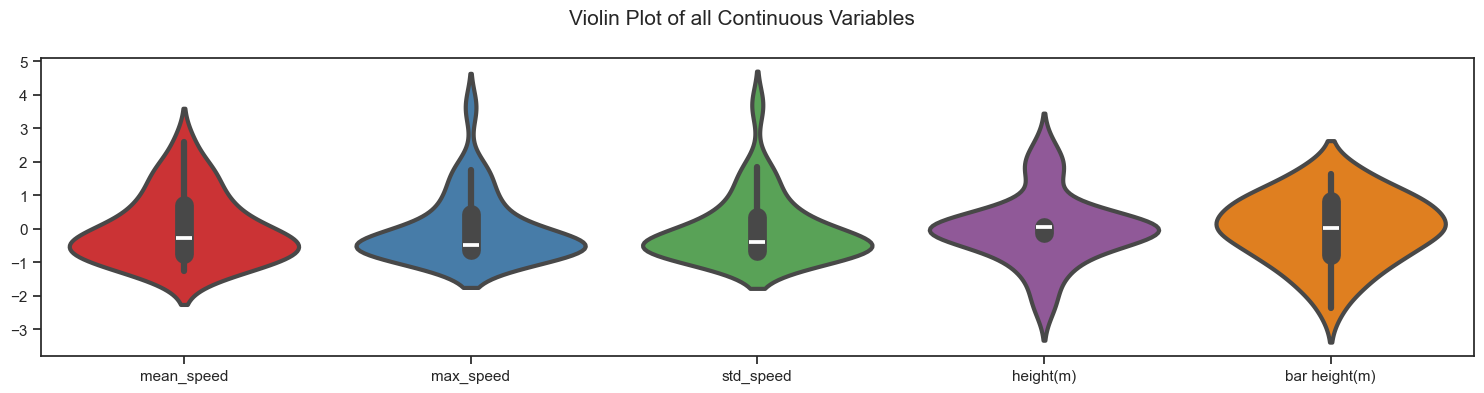

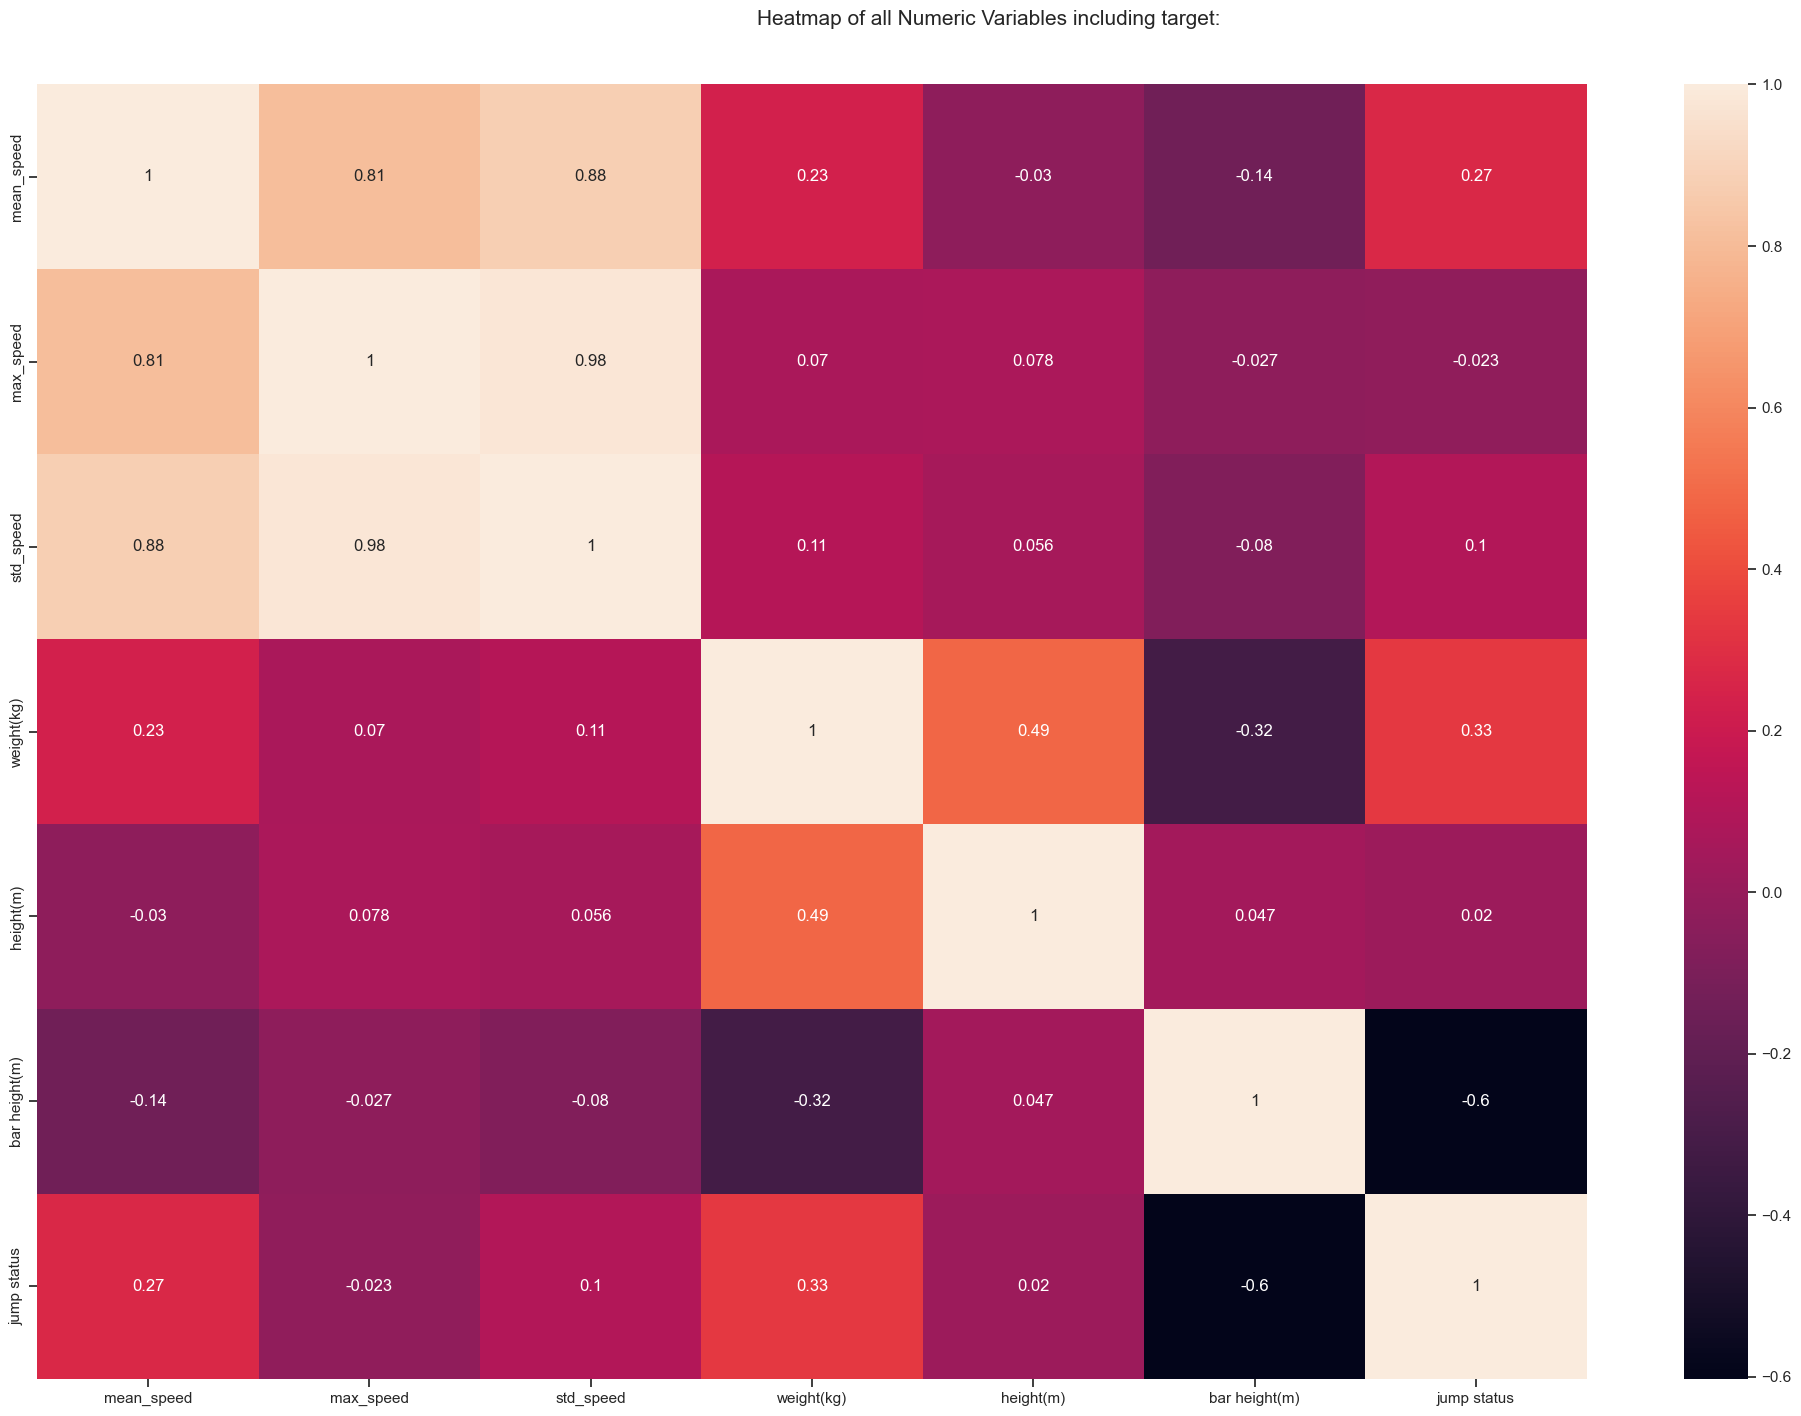

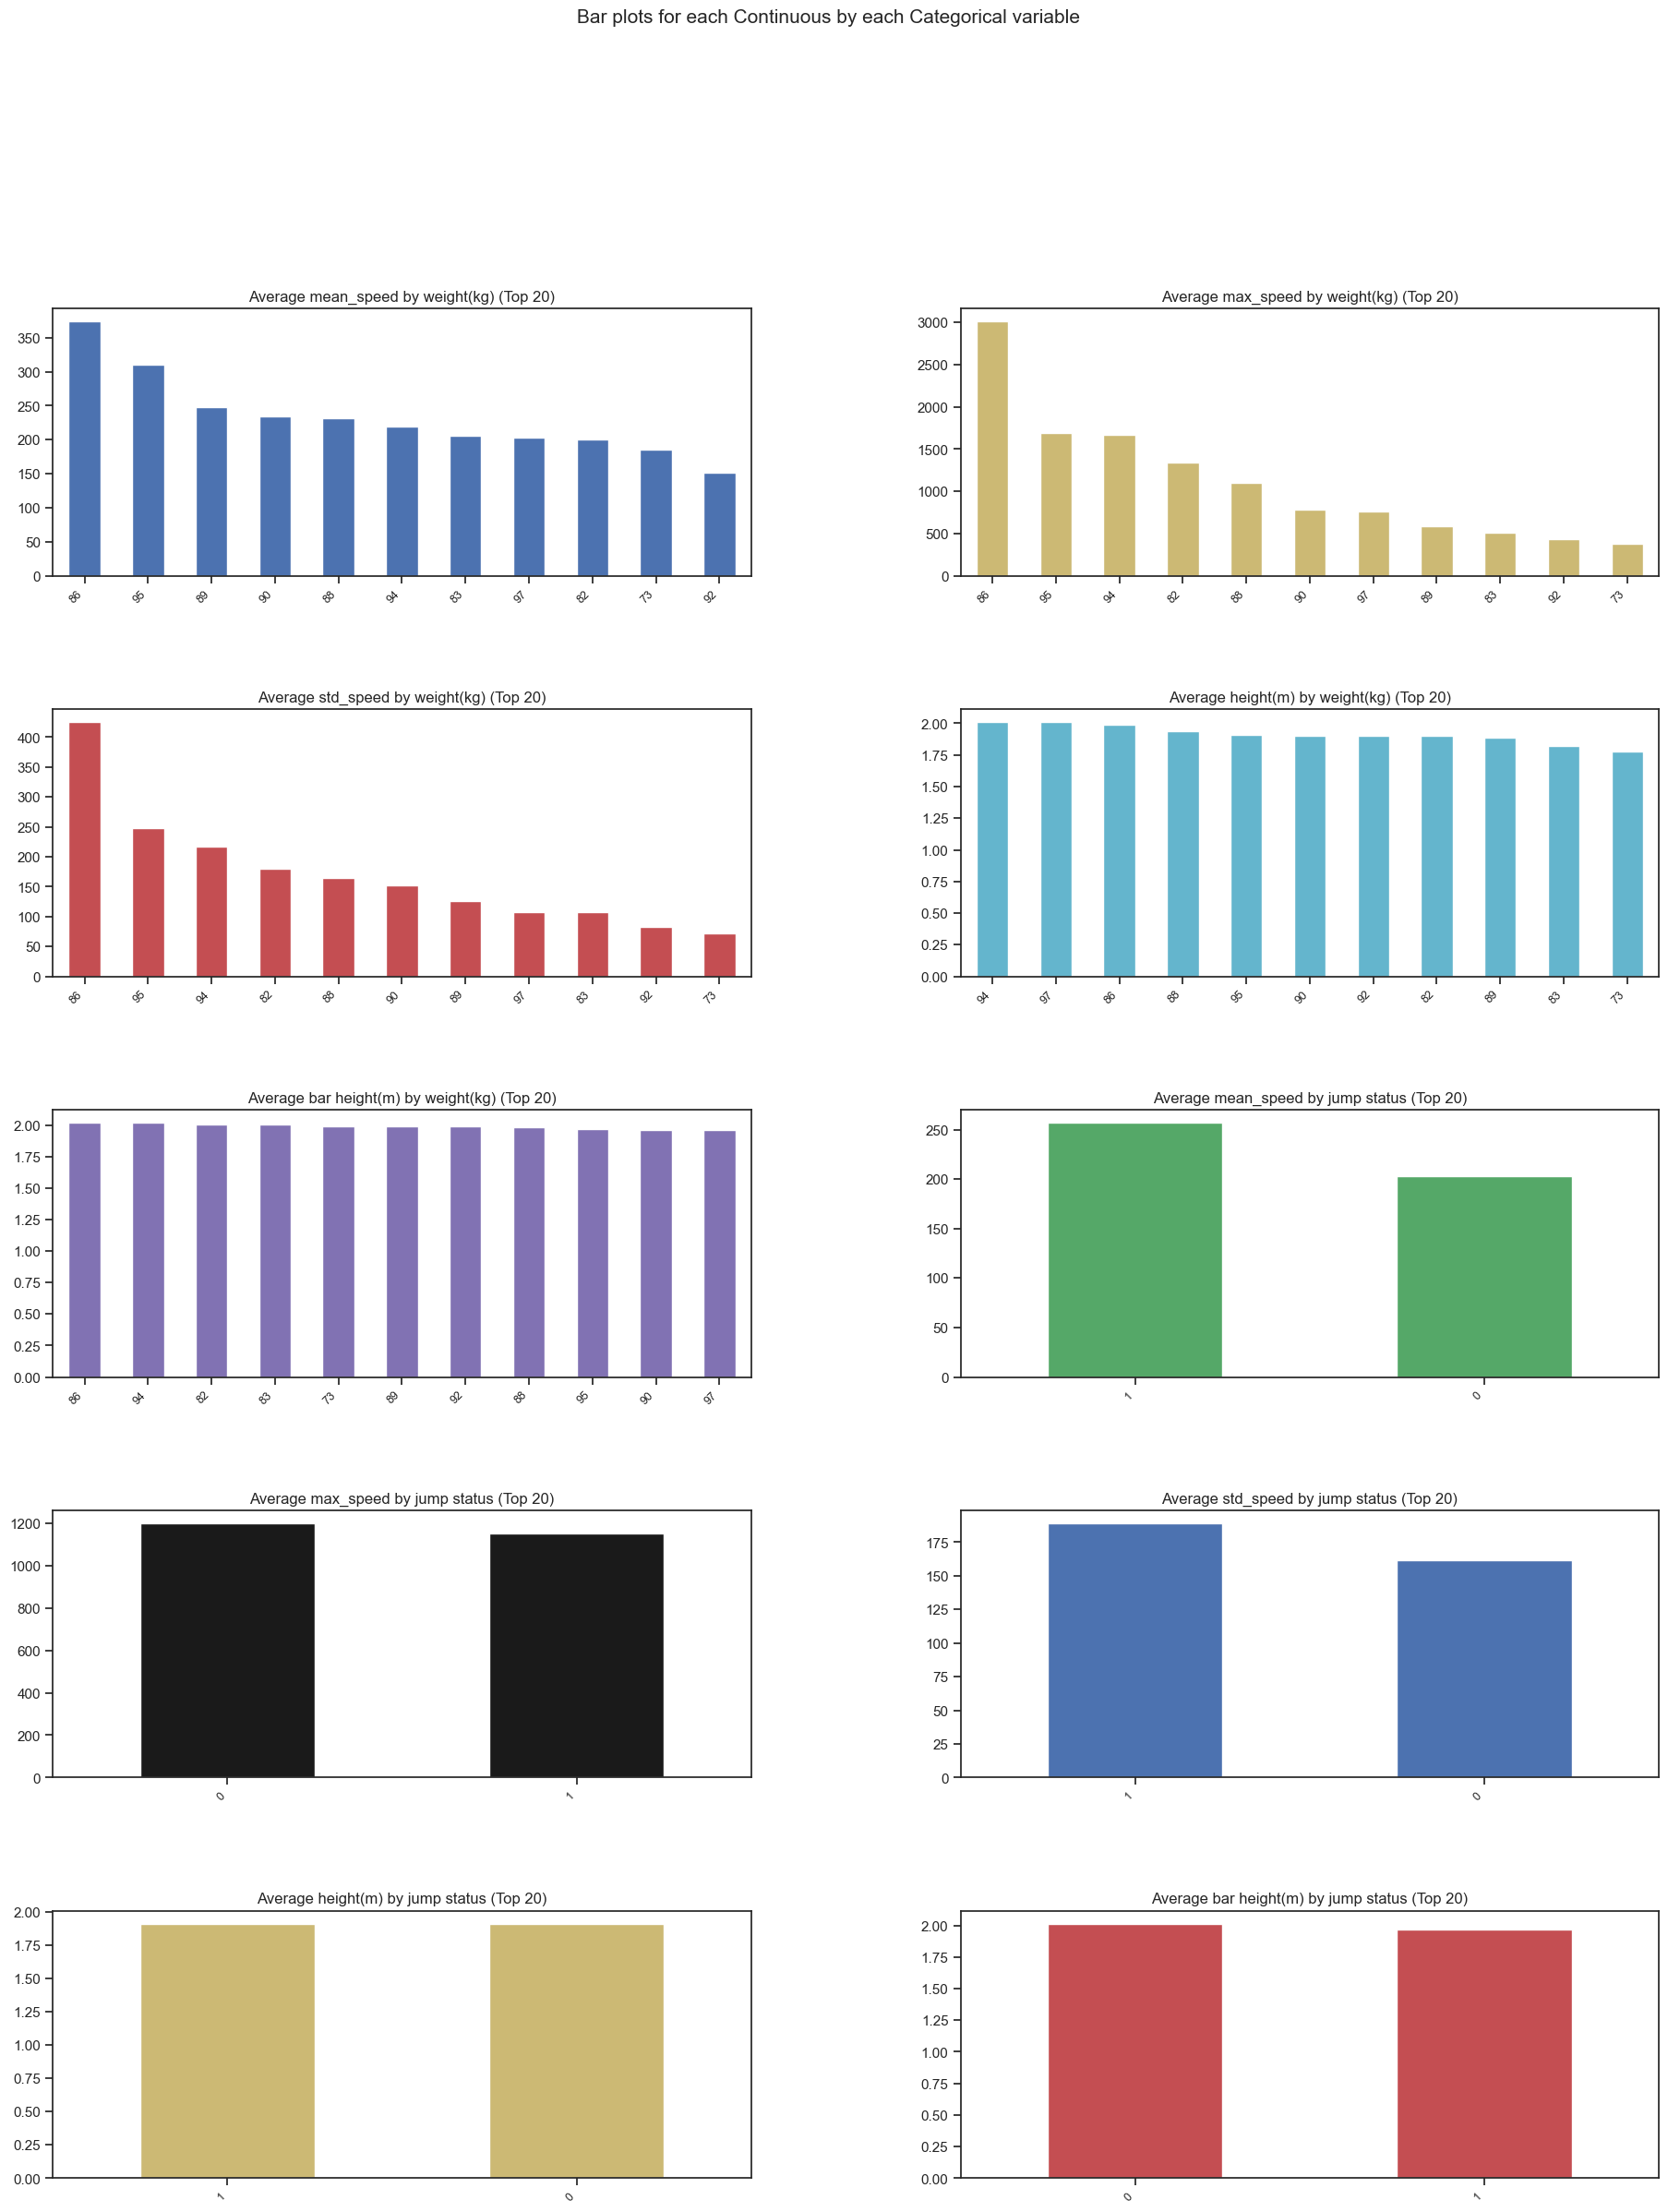

All Plots done
Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline 
filename = "example.csv"
sep=","
dft = AV.AutoViz(
    filename
)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df.head()

,mean_speed,max_speed,std_speed,weight(kg),height(m),bar height(m),jump status
0,300.714246,639.067022,121.804329,90,1.90,1.90,1
1,222.533015,647.511850,160.160976,95,1.91,1.96,1
2,311.066084,1657.120609,246.400006,95,1.91,1.99,1
3,259.761173,635.340970,142.784980,82,1.85,1.99,1
4,424.523214,2814.953228,348.906619,88,1.90,1.99,1


In [13]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values
X[0]

array([300.71424575, 639.06702227, 121.80432882,  90.        ,
         1.9       ,   1.9       ])

In [14]:
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.1,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc=StandardScaler()

In [22]:
xtrain[:,:7]=sc.fit_transform(xtrain[:,:7])

In [23]:
xtrain[0]

array([ 1.4659362 ,  0.50853862,  1.0637374 , -0.21338198,  0.61878755,
        0.33179318, -0.14302299,  2.02      ])

In [24]:
xtest[:,:7]=sc.transform(xtest[:,:7])

In [25]:
xtest[0]

array([-0.82013081, -0.68336831, -0.60854482,  1.10255022, -0.54113687,
        0.33179318, -0.14302299,  1.96      ])

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Replace these with your data
# Ensure X_train, X_test, y_train, y_test are defined before running this code

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Metrics storage
results = []


In [27]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(xtrain, ytrain)
    
    # Predictions
    y_pred = model.predict(xtest)
    y_pred_prob = model.predict_proba(xtest)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluation metrics
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    roc_auc = roc_auc_score(ytest, y_pred_prob) if y_pred_prob is not None else None

    # Append results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

    print(f"\n{name} Classification Report:\n")
    print(classification_report(ytest, y_pred))
    print("-" * 50)


Training Logistic Regression...

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

--------------------------------------------------
Training Random Forest...

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

--------------------------------------------------
Training Support Vector Machine...

Support Vector Machine Classification Report:

              preci

In [28]:
results_df = pd.DataFrame(results)
print("\nSummary of Results:\n")
print(results_df)

# Optional: Save results to CSV
results_df.to_csv("model_evaluation_results.csv", index=False)


Summary of Results:

           Model           Accuracy  Precision  Recall  F1 Score   ROC AUC
0     Logistic Regression    0.75       0.5       1.0   0.666667  0.666667
1           Random Forest    1.00       1.0       1.0   1.000000  1.000000
2  Support Vector Machine    0.75       0.5       1.0   0.666667  0.000000
3     K-Nearest Neighbors    1.00       1.0       1.0   1.000000  1.000000
4           Decision Tree    0.50       0.0       0.0   0.000000  0.333333
